Space Exploration Project


Space Exploration Project
B.Sc. Hons Computer Science - Sem 5 (DU)


Priyanshu AD-1274
Vipin Kumar AD-1601
Nikhil Kumar AD-1256

In [27]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import re
import plotly.offline as pyo

df = pd.read_csv('Space_Corrected.csv', low_memory=False, parse_dates=['Datum'])
df.head()

#for visualization
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#for preprocessing
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


Rocket Launch Overview (1957-Present)

Average Annual Launches: 67
Peak Years (1965-1978): Over 80 launches per year
Recent Trend (2016-Present): Consistent activity
Mission Outcomes:

Successful Launches: 3879
Failures: 339
Partial Failures: 102
Premature Failures: 4
Current Status:

Active Rockets: 790 (18.3% of total launches)

In [30]:
df.describe()

,Unnamed: 0.1,Unnamed: 0
count,4324.000000,4324.000000
mean,2161.500000,2161.500000
std,1248.375611,1248.375611
min,0.000000,0.000000
25%,1080.750000,1080.750000
50%,2161.500000,2161.500000
75%,3242.250000,3242.250000
max,4323.000000,4323.000000


In [31]:
# Number of Launches by Each Company
# How many launches did the companies carry out?
ds = df["Company Name"].value_counts().reset_index()[:6]
ds

,Company Name,count
0,RVSN USSR,1777
1,Arianespace,279
2,CASC,251
3,General Dynamics,251
4,NASA,203
5,VKS RF,201


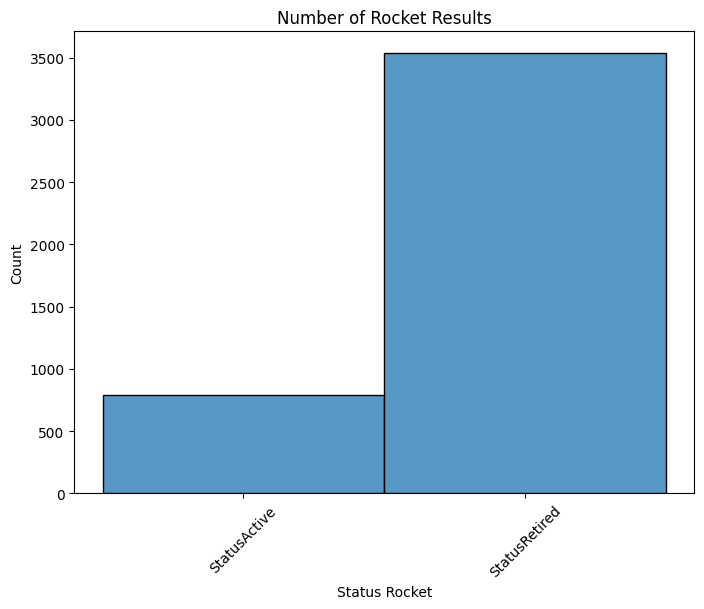

In [47]:
# Histogram Visualization
plt.figure(figsize=(8, 6))
sns.histplot(df, x ='Status Rocket')
plt.xlabel("Status Rocket")
plt.ylabel("Count")
plt.title("Number of Rocket Results")
plt.xticks(rotation=45)
plt.show()

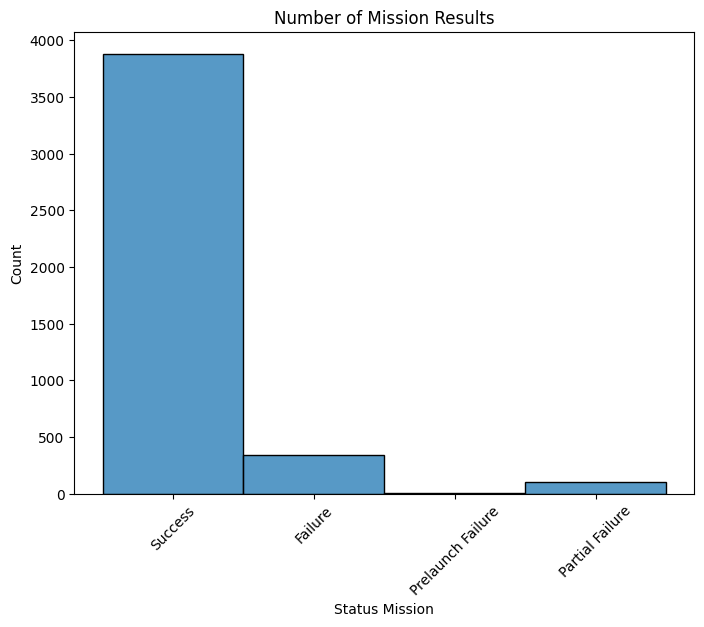

In [48]:
plt.figure(figsize=(8, 6))
sns.histplot(df, x ='Status Mission')
plt.xlabel("Status Mission")
plt.ylabel("Count")
plt.title("Number of Mission Results")
plt.xticks(rotation=45)
plt.show()

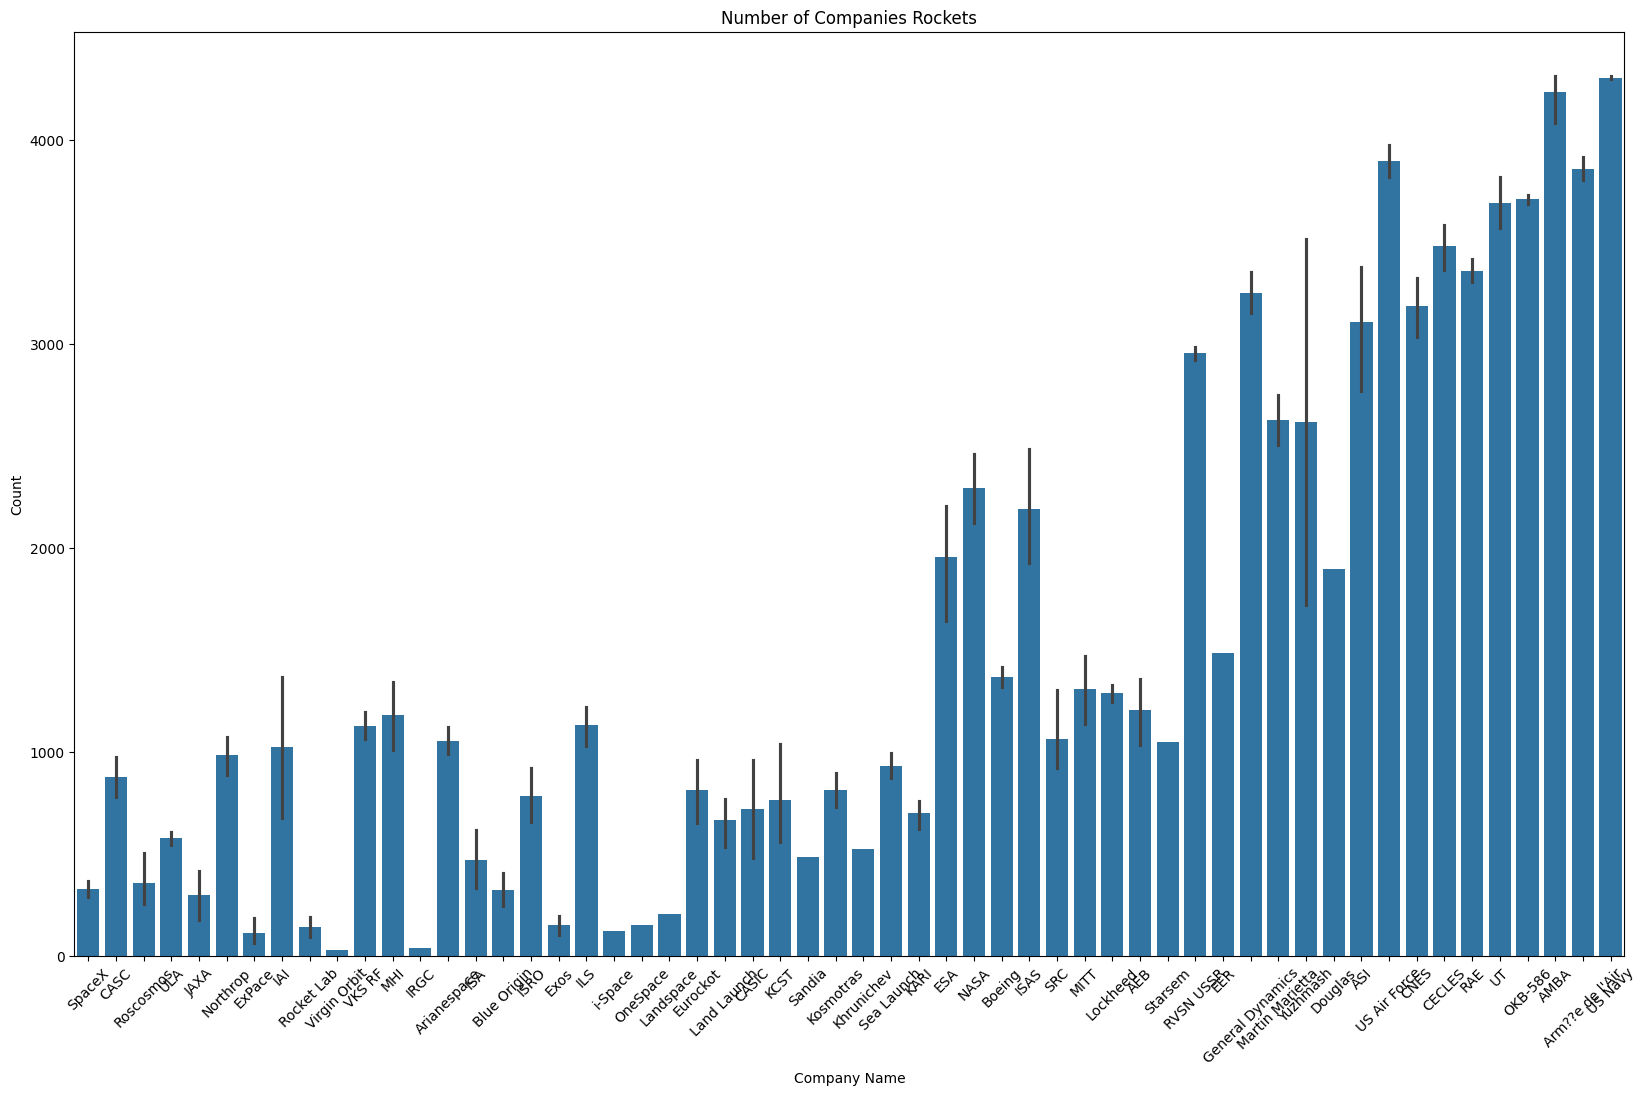

In [49]:
plt.figure(figsize=(20, 12))
sns.barplot(df, x='Company Name', y='Unnamed: 0')
plt.xlabel("Company Name")
plt.ylabel("Count")
plt.title("Number of Companies Rockets")
plt.xticks(rotation=45)
plt.show()

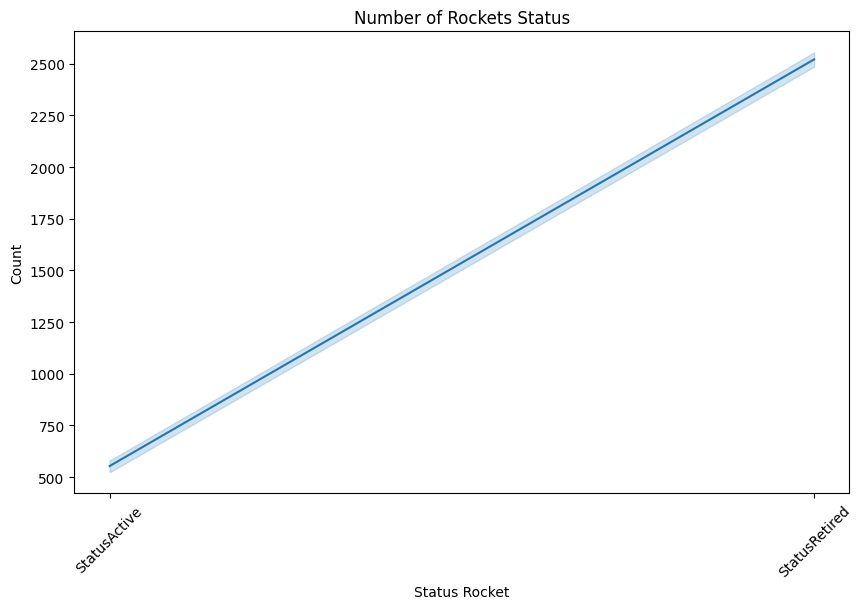

In [50]:
plt.figure(figsize=(10, 6))
sns.lineplot(df, x='Status Rocket', y='Unnamed: 0')
plt.xlabel("Status Rocket")
plt.ylabel("Count")
plt.title("Number of Rockets Status")
plt.xticks(rotation=45)
plt.show()

In [61]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from iso3166 import countries

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

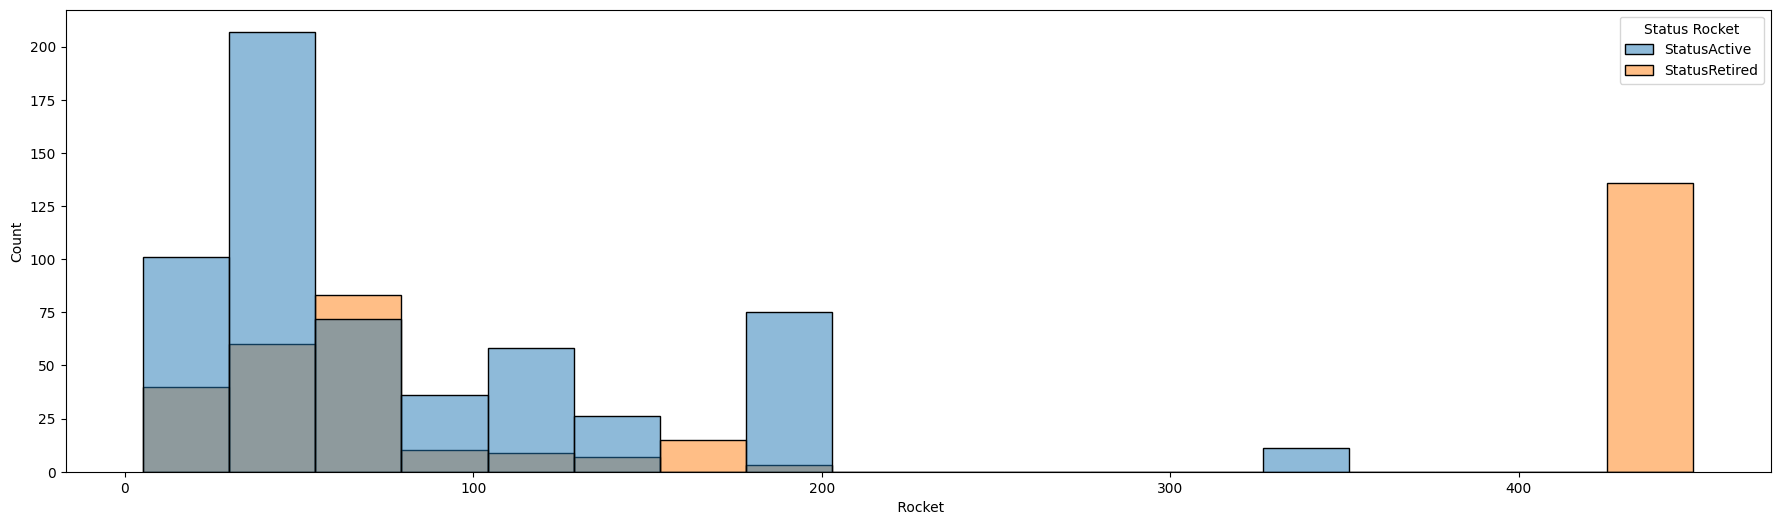

In [74]:
# Rocket Cost Distribution with Rocket Status
np.sum(pd.isna(df.loc[:," Rocket"]))

df_ = df.dropna(subset=[" Rocket"], axis = "rows")
len(df_)

np.sum(pd.isna(df_.loc[:," Rocket"]))

df_.loc[:, " Rocket"]

df_.loc[:, " Rocket"] = df_.loc[:, " Rocket"].fillna(0.0).str.replace(",","")
df_.loc[:, " Rocket"] = df_.loc[:, " Rocket"].astype(np.float64).fillna(0.0)

df_d = df_[df_.loc[:, " Rocket"]<1000]
plt.figure(figsize = (22,6))
sns.histplot(data = df_d, x = " Rocket", hue = "Status Rocket")
plt.show()

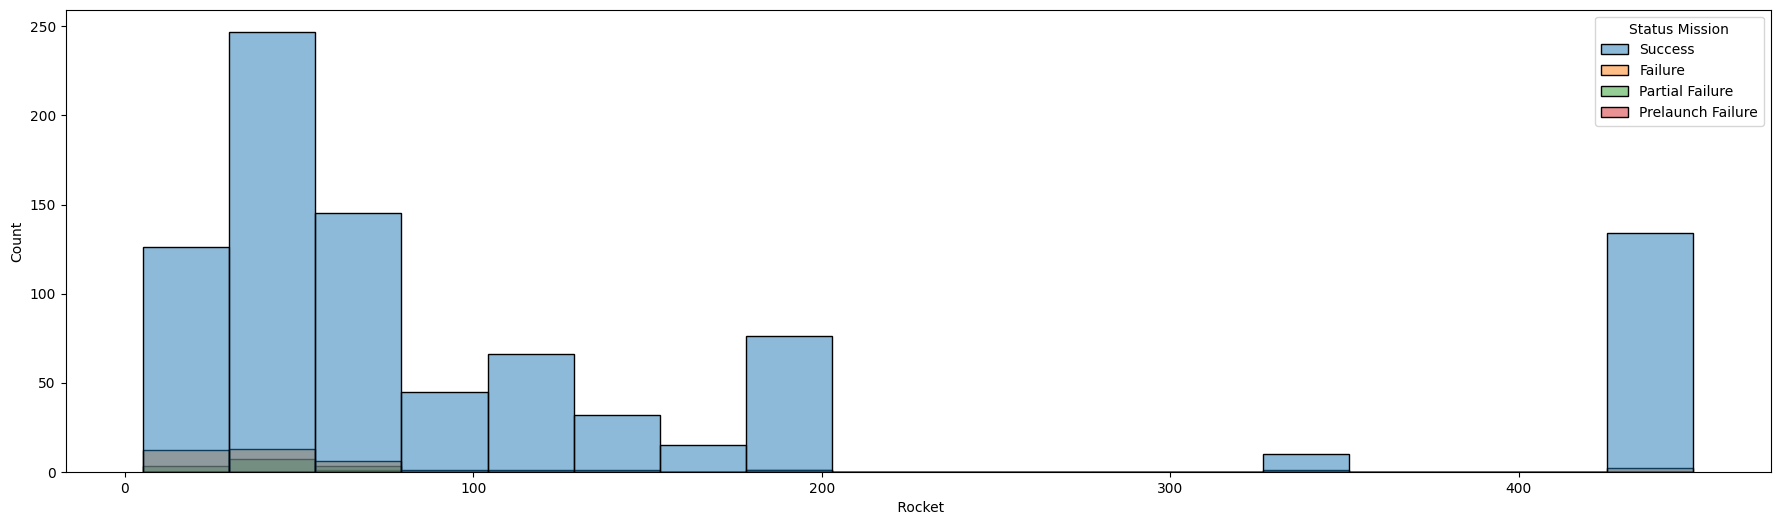

In [73]:
# Rocket Cost Distribution with Mission Status
np.sum(pd.isna(df.loc[:,"Status Mission"]))
plt.figure(figsize = (22,6))
sns.histplot(data = df_d, x = " Rocket", hue = "Status Mission")
plt.show()

In [79]:
# Total Spent Money for each Companies
df_.head()
df_money = df_.groupby(["Company Name"])[" Rocket"].sum().reset_index()
df_money = df_money[df_money[" Rocket"] > 0]
df_money.head()
df_money_ = df_money.sort_values(by = [" Rocket"], ascending = False)[:15]
df_money_.head()

,Company Name,Rocket
14,NASA,76280.0
0,Arianespace,16345.0
21,ULA,14798.0
16,RVSN USSR,10000.0
2,CASC,6340.26


In [83]:
new_df = df["Company Name"].value_counts().reset_index()[:25].sort_values(by = "Company Name", ascending = False)
new_df

,Company Name,count
5,VKS RF,201
20,US Navy,17
6,US Air Force,161
7,ULA,140
10,SpaceX,100
17,Sea Launch,36
15,Roscosmos,55
22,Rocket Lab,13
0,RVSN USSR,1777
12,Northrop,83
